## Import Libraries

In [65]:
import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [66]:
# 转换为灰度矩阵并添加标签
def read_png_to_gray_matrix(folder_path, processed_dataset):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path)
            # 转换为灰度图像
            gray_matrix = image.convert('L')
            # 添加标签
            dic = {"label": label_generate(folder_path), "matrix": np.asarray(gray_matrix)}
            processed_dataset.append(dic)
    return processed_dataset


In [64]:

# 通过路径获取标签
def label_generate(path):
    if path == train_data_path[0] or path == test_data_path[0]:
        label = "angry"
        return label
    if path == train_data_path[1] or path == test_data_path[1]:
        label = "disgust"
        return label
    if path == train_data_path[2] or path == test_data_path[2]:
        label = "fear"
        return label
    if path == train_data_path[3] or path == test_data_path[3]:
        label = "happy"
        return label
    if path == train_data_path[4] or path == test_data_path[4]:
        label = "neutral"
        return label
    if path == train_data_path[5] or path == test_data_path[5]:
        label = "sad"
        return label
    if path == train_data_path[6] or path == test_data_path[6]:
        label = "surprise"
        return label
    else:
        raise ValueError("Invalid path")


In [68]:
train_data_path = [
    '../setData/original_data_set/train/angry',
    '../setData/original_data_set/train/disgust',
    '../setData/original_data_set/train/fear',
    '../setData/original_data_set/train/happy',
    '../setData/original_data_set/train/neutral',
    '../setData/original_data_set/train/sad',
    '../setData/original_data_set/train/surprise'
]

test_data_path = [
    '../setData/original_data_set/test/angry',
    '../setData/original_data_set/test/disgust',
    '../setData/original_data_set/test/fear',
    '../setData/original_data_set/test/happy',
    '../setData/original_data_set/test/neutral',
    '../setData/original_data_set/test/sad',
    '../setData/original_data_set/test/surprise'
]


In [69]:
def process_train_data(train_data_path, write_path="../setData/processed_data_set/train/data.npy", test=True):
    processed_dataset = []
    for path in train_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Shuffle the training dataset
    np.random.shuffle(processed_dataset)

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:10])


def process_test_data(test_data_path, write_path="../setData/processed_data_set/test/data.npy", test=True):
    processed_dataset = []
    for path in test_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Optionally shuffle the test dataset - usually, you wouldn't shuffle test data
    # np.random.shuffle(processed_dataset) # Commenting this out as it's typically not done for test sets

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:10])

In [70]:
process_train_data(train_data_path)
process_test_data(test_data_path)

[{'label': 'angry', 'matrix': array([[253, 238, 193, ..., 252, 252, 255],
        [255, 190, 136, ..., 253, 255, 253],
        [255, 204, 140, ..., 247, 254, 254],
        ...,
        [ 32,  31,  32, ...,  32,  32,  33],
        [ 32,  30,  30, ...,  26,  26,  32],
        [ 39,  34,  28, ...,  20,  28,  44]], dtype=uint8)}
 {'label': 'sad', 'matrix': array([[ 65,  49,  52, ...,  10,   7,  11],
        [ 63,  51,  37, ...,   8,   9,  16],
        [ 56,  44,  30, ...,  14,  11,  21],
        ...,
        [ 89,  95,  99, ..., 102, 103, 108],
        [ 83,  89,  93, ...,  97,  97, 116],
        [ 82,  79,  83, ...,  98,  98, 104]], dtype=uint8)}
 {'label': 'neutral', 'matrix': array([[176, 129,  60, ..., 118, 168, 171],
        [160,  88,  60, ..., 102, 160, 169],
        [137,  57,  62, ...,  90, 151, 170],
        ...,
        [133, 130, 133, ..., 112, 114, 116],
        [131, 132, 132, ..., 112, 114, 115],
        [131, 135, 131, ..., 112, 114, 112]], dtype=uint8)}
 {'label': 'neutral

## Data Visualization

In [92]:
import pandas as pd
import numpy as np

# load data from dataset
data_path = "../setData/processed_data_set/train/data.npy"
data = np.load(data_path, allow_pickle=True)

# convert to dataframe
df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in data])

df.shape
df.head(5)


,emotion,pixels
0,angry,"[253, 238, 193, 101, 72, 80, 124, 146, 142, 14..."
1,sad,"[65, 49, 52, 56, 14, 19, 11, 8, 10, 12, 11, 12..."
2,neutral,"[176, 129, 60, 64, 64, 67, 74, 82, 91, 91, 93,..."
3,neutral,"[48, 46, 34, 31, 30, 23, 26, 33, 47, 45, 42, 4..."
4,surprise,"[228, 232, 231, 230, 232, 227, 229, 112, 77, 9..."


In [93]:
emotion_counts = df['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'number']
print(emotion_counts)

    emotion  number
0     happy    7215
1   neutral    4965
2       sad    4830
3      fear    4097
4     angry    3995
5  surprise    3171
6   disgust     436


/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_6703/1779081672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


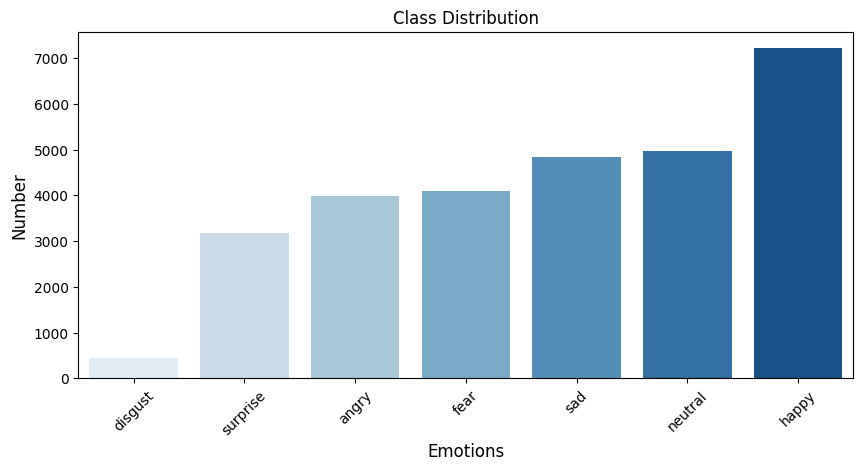

In [94]:
# Sort emotions by the number of images
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Generate a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

# Plotting the bar graph with sorted emotions and gradient colors
plt.figure(figsize=(10, 4.5))
sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.xticks(rotation=45) # If necessary, to improve label readability
plt.show()